In this file we will look at the output of finding the rates of different binaries after having run the slurm job (on the loss mass COMPAS output)

I will look at both executes of rates of all DCOS+WD and just WD

I will also look at the separations of the mass combinations of the WD+WD systems that merge within a hubble time

I will also look at the total mass distirbutions of all WD+WD and see what separations would make different combinations to merge

In [1]:
# all of the necessary imports
import h5py as h5  #importing, make sure the kernel is correct or the module will be unknown
import pandas as pd
from astropy.table import Table
from astropy import units as u
from astropy import constants as const
import numpy as np
import matplotlib.pyplot as plt
plt.rc('text.latex', preamble=r'\usepackage{textgreek}')
plt.rc('font', family='serif')

In [2]:
import sys
import os

# Add the subdir to sys.path
sys.path.append('/home/jovyan/home/research_work/useful_py_scripts/')

# Now you can import the module
import useful_fncs 


In [3]:
# reading in the HDF5 file
pathTorates_NS = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_NSNS_AIS/CosmicIntegration/Rate_info.h5' #path of the hdf5 file

Data_rates_NS = h5.File(pathTorates_NS)

In [4]:
list(Data_rates_NS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned'].keys())
rates_info_NS = Data_rates_NS['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [5]:
rates_info_NS.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [6]:
display(rates_info_NS['SEED'])
display(rates_info_NS['DCOmask'])
print(sum(rates_info_NS['DCOmask'][()])) # this is summing the trues that are BNS that merged within a hubble time (same as number of SEEDs in this rate info H5 file)
display(rates_info_NS['merger_rate']) #80 redshift bins 
display(rates_info_NS['redshifts'])
print(rates_info_NS['redshifts'][()])

<HDF5 dataset "SEED": shape (3433,), type "<u8">

<HDF5 dataset "DCOmask": shape (46675,), type "|b1">

3433


<HDF5 dataset "merger_rate": shape (3433, 80), type "<f8">

<HDF5 dataset "redshifts": shape (80,), type "<f8">

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9]


In [7]:
dco_mask_NS = rates_info_NS['DCOmask'][()]

In [8]:
# reading in the HDF5 file
pathToweights_NS = '/home/jovyan/CompasOutput/v02.46.01/N1e6_Fid_NSNS_AIS/MainRun/COMPAS_Output_wWeights.h5' #path of the hdf5 file

Data_weights_NS = h5.File(pathToweights_NS)

In [9]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_NS_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights_NS["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_NS_data[key] = Data_weights_NS["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

#### Doing rates analysis on the AIS WD hdf5 output

In [10]:
# reading in the HDF5 file
pathTorates_H5 = '/home/jovyan/home/rate_outputs/Rate_info_WDWD_1.h5' #path of the hdf5 file

Data_rates = h5.File(pathTorates_H5)

In [11]:
Data_rates.keys()

<KeysViewHDF5 ['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']>

In [12]:
rates_info = Data_rates['Rates_mu00.025_muz-0.049_alpha-1.79_sigma01.129_sigmaz0.048_a0.017_b1.487_c4.442_d5.886_zBinned']

In [13]:
rates_info.keys()

<KeysViewHDF5 ['DCOmask', 'SEED', 'merger_rate', 'redshifts']>

In [14]:
# reading in the HDF5 file
pathToweights_H5 = '/home/jovyan/home/edit_hdf5/WDWD/v02.46.01/COMPAS_Output_wWeights.h5' #path of the hdf5 file

Data_weights = h5.File(pathToweights_H5)

In [15]:
Data_weights.keys()

<KeysViewHDF5 ['BSE_Common_Envelopes', 'BSE_Double_Compact_Objects', 'BSE_Pulsar_Evolution', 'BSE_RLOF', 'BSE_Supernovae', 'BSE_System_Parameters', 'Run_Details']>

In [16]:
# we want to read in the bse_RLOF to get information about thes different systems

DCO_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_Double_Compact_Objects"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    DCO_WD_data[key] = Data_weights["BSE_Double_Compact_Objects"][key][()] # adding these columns to the dataframe

Now we need to do things with WD+WD and NS simultaneously 

In [17]:
# gathering the seeds from the rates.h5 file - this is for the WD+WD
dco_mask = rates_info['DCOmask'][()]
merging_all_WD = DCO_WD_data[dco_mask]
merging_all_WD

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),Optimistic_CE,Record_Type,Recycled_NS(1),Recycled_NS(2),SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,mixture_weight
463,1,64.106710,0.0,0,"b""b'8 '""","b""b'3 '""",0.483516,0.394784,1,0.000438,0,1,NaN,NaN,29,0.517110,11,11,1536.080151,7.360919
464,2,0.049491,0.0,0,"b""b'5 '""","b""b'3 '""",0.568929,0.211294,1,0.002140,0,1,NaN,NaN,86,0.074546,11,10,8874.314167,7.842265
465,1,8321.641517,0.0,0,"b""b'3 '""","b""b'5 '""",0.320580,0.526926,1,0.002418,0,1,NaN,NaN,87,1.677890,10,11,4428.913115,10.000000
466,1,441.783850,0.0,0,"b""b'1-2 '""","b""b'5-8 '""",0.276373,0.679873,1,0.012405,0,1,NaN,NaN,97,0.852472,10,11,1390.603090,9.999991
467,1,7164.965181,0.0,0,"b""b'2 '""","b""b'3 '""",0.527024,0.316107,1,0.000135,0,1,NaN,NaN,128,1.608598,11,10,3852.634168,9.992004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17486,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,0,1,NaN,NaN,999745,1.354646,11,11,109.254748,0.298381
17487,2,2834.654788,0.0,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,0,1,NaN,NaN,999761,1.610884,11,11,940.615944,0.254697
17488,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,0,1,NaN,NaN,999871,1.558990,11,11,1787.995323,0.212650
17489,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,0,1,NaN,NaN,999912,1.954841,11,11,382.472452,0.160558


In [18]:
# let# selecting for when the RLOF post CE flag is set to true
rlof_post_ce = merging_all_WD['Immediate_RLOF>CE']==True
sum(rlof_post_ce)
# this means we must run FCI on these systems again to select for the rates of these specific systems


0

In [19]:
merging_all_NS = DCO_NS_data[dco_mask_NS]
merging_all_NS

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,SEED,SemiMajorAxis@DCO,Stellar_Type(1),Stellar_Type(2),Time,dmMT(1),dmMT(2),dmWinds(1),dmWinds(2),mixture_weight
323,1,4.914255,0.144223,0,b'2 ',b'4-8 ',1.210342,1.442315,1,0.000686,...,7235,0.002952,13,13,38.082441,0.000099,-1.448854,0.0,0.0,0.024294
1336,1,110.465241,0.730318,0,b'2 ',b'4-8 ',1.260087,1.424028,1,0.000537,...,29725,0.012377,13,13,39.974896,0.000087,-1.417040,0.0,0.0,0.028337
1759,1,3594.070404,0.356025,0,b'5 ',b'8 ',1.480496,1.171439,1,0.025743,...,39167,0.016939,13,13,24.544319,0.000072,-1.093873,0.0,0.0,0.011341
1915,1,15.038578,0.292517,0,b'4-8 ',b'8 ',1.188053,1.203831,1,0.001179,...,42602,0.003843,13,13,38.306424,0.000179,-1.376143,0.0,0.0,0.025722
1955,1,6.854551,0.692189,0,b'2 ',b'4-8 ',1.260033,1.195963,1,0.013255,...,43466,0.005260,13,13,36.808308,0.000033,-1.205352,0.0,0.0,0.023426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46667,1,2.035270,0.304401,0,b'2 ',b'4-8 ',1.242316,1.573235,1,0.002852,...,999727,0.002643,13,13,35.825917,0.000153,-1.611445,0.0,0.0,0.013998
46668,1,0.978486,0.008180,0,b'2 ',b'4-8 ',1.260145,1.554736,1,0.000184,...,999770,0.002022,13,13,36.031843,0.000145,-1.593994,0.0,0.0,0.025480
46671,1,2.060512,0.283681,0,b'2 ',b'4-8 ',1.260112,1.308423,1,0.000471,...,999894,0.002454,13,13,40.501417,0.000112,-1.432607,0.0,0.0,0.007313
46672,1,0.808230,0.271005,0,b'2 ',b'4-8 ',1.260144,1.752863,1,0.000146,...,999931,0.002160,13,13,36.358539,0.000144,-1.707163,0.0,0.0,0.017477


In [20]:
print(np.shape(rates_info['merger_rate'][:,0]))

(17028,)


In [21]:
# print(np.shape(rates_info['merger_rate'][0,:]))
# rates_info['merger_rate'][0,:]

In [22]:
# making a new column in the DCO_WD dataset that includes the merger rates at redhsift zero for each system
# merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]

In [23]:
rates_info['merger_rate'][0,:].shape[0]

80

In [24]:
len(rates_info['merger_rate'][:,3])

17028

In [25]:
rates = rates_info['merger_rate']

for i in range(rates_info['merger_rate'][0,:].shape[0]):

    merging_all_WD['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]

/tmp/ipykernel_66990/3880007837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_WD['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_66990/3880007837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_WD['merger_rate_z'+str(i)] = rates_info['merger_rate'][:,i]
/tmp/ipykernel_66990/3880007837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [26]:
# for BNS
rates_NS = rates_info_NS['merger_rate']

for i in range(rates_info_NS['merger_rate'][0,:].shape[0]):

    merging_all_NS['merger_rate_z'+str(i)] = rates_info_NS['merger_rate'][:,i]

/tmp/ipykernel_66990/453081479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_NS['merger_rate_z'+str(i)] = rates_info_NS['merger_rate'][:,i]
/tmp/ipykernel_66990/453081479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merging_all_NS['merger_rate_z'+str(i)] = rates_info_NS['merger_rate'][:,i]
/tmp/ipykernel_66990/453081479.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

#### Selecting only the COWD

In [27]:
HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = useful_fncs.WD_BINARY_BOOLS(merging_all_WD)
carbon_oxygen_bool = np.logical_or(ONeCOWD_bool,np.logical_or(COONeWD_bool,np.logical_or(COHeWD_bool,np.logical_or(COWD_bool,HeCOWD_bool))))
merging_all_COWD = merging_all_WD[carbon_oxygen_bool]

In [28]:
merging_all_COWD

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
463,1,64.106710,0.0,0,"b""b'8 '""","b""b'3 '""",0.483516,0.394784,1,0.000438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464,2,0.049491,0.0,0,"b""b'5 '""","b""b'3 '""",0.568929,0.211294,1,0.002140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465,1,8321.641517,0.0,0,"b""b'3 '""","b""b'5 '""",0.320580,0.526926,1,0.002418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,1,441.783850,0.0,0,"b""b'1-2 '""","b""b'5-8 '""",0.276373,0.679873,1,0.012405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,1,7164.965181,0.0,0,"b""b'2 '""","b""b'3 '""",0.527024,0.316107,1,0.000135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17486,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17487,2,2834.654788,0.0,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17488,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17489,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# let's make sure there are the at leats one COWD in the dataframe
star_co = np.logical_or(merging_all_COWD['Stellar_Type(1)']==11,merging_all_COWD['Stellar_Type(2)']==11)
sum(star_co)

17028

In [30]:
# let's slice where there are systems with WD above Chandrasekhar limit
chandra_bool_m1m2 = np.logical_and(merging_all_COWD['Mass(1)']<1.44,merging_all_COWD['Mass(2)']<1.44)
merging_all_COWD_sub_chandra = merging_all_COWD[chandra_bool_m1m2]
merging_all_COWD_sub_chandra

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
463,1,64.106710,0.0,0,"b""b'8 '""","b""b'3 '""",0.483516,0.394784,1,0.000438,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
464,2,0.049491,0.0,0,"b""b'5 '""","b""b'3 '""",0.568929,0.211294,1,0.002140,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
465,1,8321.641517,0.0,0,"b""b'3 '""","b""b'5 '""",0.320580,0.526926,1,0.002418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
466,1,441.783850,0.0,0,"b""b'1-2 '""","b""b'5-8 '""",0.276373,0.679873,1,0.012405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
467,1,7164.965181,0.0,0,"b""b'2 '""","b""b'3 '""",0.527024,0.316107,1,0.000135,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17486,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17487,2,2834.654788,0.0,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17488,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17489,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
merging_all_COWD_sub_chandra[merging_all_WD.columns[21]]

463       0.038325
464      31.147965
465       0.000000
466      52.597200
467       1.624250
           ...    
17486     0.000008
17487     1.835412
17488     0.000972
17489     0.300099
17490     0.515835
Name: merger_rate_z1, Length: 17028, dtype: float64

In [32]:
merging_all_COWD[merging_all_COWD.columns[20]]

463       0.027839
464      19.023905
465       0.648220
466      46.271169
467       1.031348
           ...    
17486     0.000006
17487     1.592208
17488     0.000674
17489     0.246776
17490     0.432705
Name: merger_rate_z0, Length: 17028, dtype: float64

In [33]:
# seeing what the different types of syntax do
print(np.mean(merging_all_COWD[merging_all_COWD.columns[20]]))
print(merging_all_COWD.columns[20])
print(len(merging_all_COWD[merging_all_COWD.columns[20]]))
print(len(merging_all_COWD.columns[20]))

3.3926413394170223
merger_rate_z0
17028
14


#### let's get where M_tot > 1.4 solar masses

In [34]:
# let's get where M_tot > 1.4 solar masses
tot_chandra_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] > 1.4
merging_all_COWD_chan = merging_all_COWD[tot_chandra_bool]
merging_all_COWD_chan

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
470,2,746.914029,0.0,0,"b""b'6 '""","b""b'3-8 '""",1.266761,0.683914,1,0.001246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
486,1,1078.118621,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.097638,0.710329,1,0.000465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,1,7817.949768,0.0,0,"b""b'2 '""","b""b'5-8 '""",0.480298,1.129562,1,0.000316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,2,6556.509232,0.0,0,"b""b'6 '""","b""b'3 '""",1.346163,0.439681,1,0.029978,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,1,1918.564903,0.0,0,"b""b'2-8 '""","b""b'4 '""",0.943178,0.673086,1,0.000232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17485,2,1567.477929,0.0,0,"b""b'6 '""","b""b'4-8 '""",1.330292,0.663417,1,0.000111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17486,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17488,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17489,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now that we have the rates let's plot the redshift vs the rates

Let's make a dataframe that just selects for at leadt one COWD that is more thatn 0.9 solar masses

In [35]:
# let's select just for the COWD with mass greater than 0.9 solar masses 
massive_COWD_bool_1 = np.logical_and(merging_all_WD['Stellar_Type(1)']==11, merging_all_WD['Mass(1)']>0.9)
massive_COWD_bool_2 = np.logical_and(merging_all_WD['Stellar_Type(2)']==11, merging_all_WD['Mass(2)']>0.9)

cowd_sn_bool = np.logical_or(massive_COWD_bool_1,massive_COWD_bool_2)
DCO_COWD_SN = merging_all_WD[cowd_sn_bool]
DCO_COWD_SN

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
486,1,1078.118621,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.097638,0.710329,1,0.000465,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
497,1,7817.949768,0.0,0,"b""b'2 '""","b""b'5-8 '""",0.480298,1.129562,1,0.000316,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
506,1,1918.564903,0.0,0,"b""b'2-8 '""","b""b'4 '""",0.943178,0.673086,1,0.000232,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
510,2,5345.530020,0.0,0,"b""b'5 '""","b""b'5-8 '""",1.104234,0.679025,1,0.000981,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
521,2,206.734814,0.0,0,"b""b'5-8 '""","b""b'4-8 '""",1.326412,0.418950,1,0.002358,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17481,1,623.438167,0.0,0,"b""b'2-8 '""","b""b'3-8 '""",1.102845,0.650778,1,0.000612,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17482,1,4076.846983,0.0,0,"b""b'2-8 '""","b""b'3 '""",1.250117,0.703484,1,0.024066,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17483,1,1056.787184,0.0,0,"b""b'2-8 '""","b""b'3-8 '""",1.042414,0.610693,1,0.006919,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17486,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Let's make a similar dataset but for low mass COWD

In [36]:
# let's select just for the COWD with mass greater than 0.9 solar masses 
small_COWD_bool_1 = np.logical_and(merging_all_WD['Stellar_Type(1)']==11, merging_all_WD['Mass(1)']>0.6)
small_COWD_bool_2 = np.logical_and(merging_all_WD['Stellar_Type(2)']==11, merging_all_WD['Mass(2)']>0.6)

cowd_small_bool = np.logical_or(small_COWD_bool_1,small_COWD_bool_2)
DCO_COWD_SMALL = merging_all_WD[cowd_small_bool]
DCO_COWD_SMALL

,CE_Event_Counter,Coalescence_Time,Eccentricity@DCO,Immediate_RLOF>CE,MT_Donor_Hist(1),MT_Donor_Hist(2),Mass(1),Mass(2),Merges_Hubble_Time,Metallicity@ZAMS(1),...,merger_rate_z70,merger_rate_z71,merger_rate_z72,merger_rate_z73,merger_rate_z74,merger_rate_z75,merger_rate_z76,merger_rate_z77,merger_rate_z78,merger_rate_z79
466,1,441.783850,0.0,0,"b""b'1-2 '""","b""b'5-8 '""",0.276373,0.679873,1,0.012405,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
468,1,72.714595,0.0,0,"b""b'2-8 '""","b""b'3 '""",0.733251,0.233633,1,0.023776,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
469,2,0.024441,0.0,0,"b""b'5 '""","b""b'3 '""",0.607901,0.241998,1,0.000184,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
470,2,746.914029,0.0,0,"b""b'6 '""","b""b'3-8 '""",1.266761,0.683914,1,0.001246,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
471,1,86.608924,0.0,0,"b""b'2 '""","b""b'5-8 '""",0.472254,0.654884,1,0.000938,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17486,1,325.360612,0.0,0,"b""b'2-8 '""","b""b'4-8 '""",1.083912,0.772944,1,0.000123,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17487,2,2834.654788,0.0,0,"b""b'5 '""","b""b'3 '""",0.770769,0.396774,1,0.013625,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17488,2,1073.100464,0.0,0,"b""b'6 '""","b""b'5 '""",0.954424,0.569040,1,0.000369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17489,1,3009.383390,0.0,0,"b""b'2-8 '""","b""b'5-8 '""",0.773363,0.658614,1,0.004168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# what is the stellar type distribution of the system
print(np.unique(DCO_COWD_SMALL['Stellar_Type(1)']))
print(np.unique(DCO_COWD_SMALL['Stellar_Type(2)']))

[10 11 12]
[10 11]


Let's take the mean value of every redshift rate value

In [38]:
range(rates_info['merger_rate'][0,:].shape[0])

range(0, 80)

In [39]:
# gettign the mean merger rate per system
mean_rate_WD_MASSIVE = []

# looping through each collection of merger rates
for j in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    mean_r = np.mean(DCO_COWD_SN[DCO_COWD_SN.columns[20+j]])
    mean_rate_WD_MASSIVE.append(mean_r)

In [40]:
# gettign the mean merger rate per system
mean_rate_WD_small = []

# looping through each collection of merger rates
for j in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    mean_r = np.mean(DCO_COWD_SMALL[DCO_COWD_SMALL.columns[20+j]])
    mean_rate_WD_small.append(mean_r)

In [41]:
# gettign the mean merger rate per system
mean_rate_more_chandra = []

# looping through each collection of merger rates
for j in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    mean_r_chandra = np.mean(merging_all_COWD_chan[merging_all_COWD_chan.columns[20+j]])
    mean_rate_more_chandra.append(mean_r_chandra)

In [42]:
# gettign the mean merger rate per system
mean_rate_NS = []

# looping through each collection of merger rates
for j in range(rates_info_NS['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    mean_r_NS = np.mean(merging_all_NS[merging_all_NS.columns[20+j]])
    mean_rate_NS.append(mean_r_NS)

In [43]:
# redshifts = rates_info['redshifts']

# print(redshifts.shape)
# print(np.shape(mean_rate))
# redshifts[()]

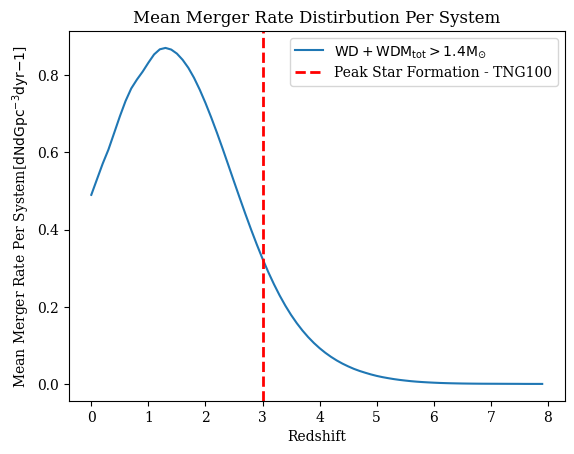

In [44]:
## let's plot the merger rates over redshift
redshifts = rates_info['redshifts']
plt.plot(redshifts[()],mean_rate_WD_MASSIVE,label=r'$\mathrm{WD+WD M_{tot} > 1.4 M_{\odot}}$')

# let's get the maximum of the mean merger rate and at which redshift this occurred
max_mean_rate = max(mean_rate_WD_MASSIVE)

# let's add a line to add important events that have happened
## peak of star formation? - TNG100 perscription
plt.axvline(3, color='r', linestyle='--', linewidth=2,label='Peak Star Formation - TNG100')
# plt.text(2.4, 2.2, "Peak of General Star Formation", fontsize=9)
# plt.arrow(2.7,2.4,-0.5,0.3,head_width=0.05,head_starts_at_zero=False)

## plotting the max mean rate
# plt.text(-0.3,4,'Max Mean Rate = ',fontsize=8)
# plt.text(-0.3,3.7,round(max_mean_rate,4),fontsize=8)
# plt.text(0.2,3.7,r'[$dNdGpc^{-3}dyr{-1}$]',fontsize=8)

## labels
plt.ylabel(r"Mean Merger Rate Per System[$\mathrm{dNdGpc^{-3}dyr{-1}}$]")
plt.xlabel(r"Redshift")
plt.title(r"Mean Merger Rate Distirbution Per System")
plt.legend()


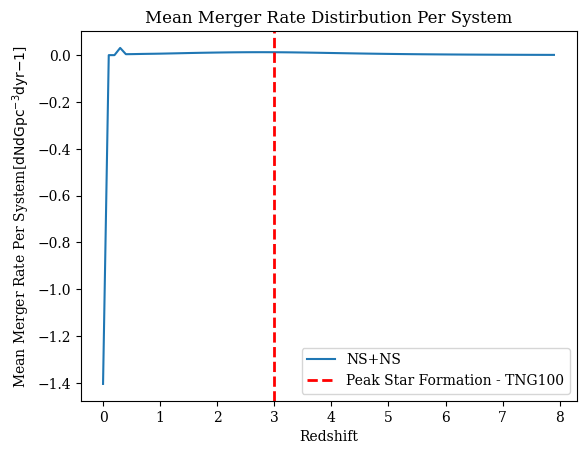

In [45]:
## let's plot the merger rates over redshift
redshifts_NS = rates_info_NS['redshifts']
plt.plot(redshifts_NS[()],mean_rate_NS,label='NS+NS')


# let's add a line to add important events that have happened
## peak of star formation? - TNG100 perscription
plt.axvline(3, color='r', linestyle='--', linewidth=2,label='Peak Star Formation - TNG100')


## labels
plt.ylabel(r"Mean Merger Rate Per System[$\mathrm{dNdGpc^{-3}dyr{-1}}$]")
plt.xlabel(r"Redshift")
plt.title(r"Mean Merger Rate Distirbution Per System")
plt.legend()


Getting the total merger rate for a specific redshift

In [46]:
# gettign the mean merger rate per system
total_merger_rate_WD = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate = np.sum(DCO_COWD_SN[DCO_COWD_SN.columns[20+s]])
    total_merger_rate_WD.append(tota_rate)

In [47]:
# gettign the mean merger rate per system
total_merger_rate_WD_small = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate = np.sum(DCO_COWD_SMALL[DCO_COWD_SMALL.columns[20+s]])
    total_merger_rate_WD_small.append(tota_rate)

In [48]:
# BNS
# gettign the mean merger rate per system
total_merger_rate_NS = []

# looping through each collection of merger rates
for s in range(rates_info_NS['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_NS = np.sum(merging_all_NS[merging_all_NS.columns[20+s]])
    total_merger_rate_NS.append(tota_rate_NS)

In [49]:
# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra = np.sum(merging_all_COWD_chan[merging_all_COWD_chan.columns[20+s]])
    chandra_merger_rate.append(tota_rate_chandra)

In [50]:
# extracting the redshifts and rates from Briel et al
# units in the appendix should be in h^-3 y^-1 Gpc^-3 so we must convert below to get yr^-1 Gpc^-3
h_little = 0.6766

redshifts_briel = [
    0, 0.01, 0.03, (0.025+0.050)/2, 0.073, (0.05+0.15)/2, (0.075+0.125)/2, 0.11, 0.11, 0.13, 
    0.15, (0.125+0.175)/2, 0.16, (0.175+0.225)/2, 0.2, 0.25, (0.15+0.35)/2, (0.225+0.275)/2, 
    0.26, 0.3, (0.275+0.325)/2, 0.35, 0.35, 0.42, 0.44, 0.45, 0.45, (0.35+0.55)/2, 0.46, 0.47, 
    0.47, 0.55, 0.55, 0.55, 0.62, 0.65, (0.55+0.75)/2, 0.65, 0.74, 0.75, 0.75, 0.75, 0.8, 0.83, 0.85, 
    0.85, 0.94, 0.95, 0.95, 1.05, 1.1, 1.14, 1.21, 1.23, 1.25, 1.59, 1.61, 1.69, 1.75, 2.25
]

rates_briel = [
    0.77, 0.82, 0.82, 0.81, 0.71, 1.60, 0.76, 1.08, 0.72, 0.58, 0.93, 0.90, 0.41, 1.01, 0.58,
    1.05, 1.14, 1.06, 0.82, 0.99, 1.27, 0.99, 1.05, 1.34, 0.76, 0.90, 1.05, 1.52, 1.40, 1.22, 
    2.33, 0.93, 1.40, 1.52, 3.76, 1.40, 2.01, 1.43, 2.30, 1.49, 1.98, 1.69, 2.45, 3.79, 2.27, 
    1.66, 1.31, 2.22, 2.24, 2.30, 2.16, 2.06, 3.85, 2.45, 1.87, 1.31, 1.22, 2.97, 2.10, 1.43
]

# converting the rates to the correct units
rates_briel = np.array(rates_briel)
converted_rates_briel = (rates_briel*(10**5))*(h_little**3)

## uncertainties
lower_limits = [
    -0.10, -0.26, -0.32, -0.24, -0.08, -0.85, -0.13, -0.29, -0.20, -0.18, -0.67, -0.10, -0.26, -0.09, 
    -0.23, -0.76, -0.35, -0.08, -0.20, -0.44, -0.10, -0.55, -0.17, -0.93, -0.39, -0.44, -0.17, -0.38, 
    -0.50, -0.17, -0.79, -0.41, -0.17, -0.26, -1.66, -0.15, -0.52, -0.50, -1.20, -0.55, -0.61, -0.17, 
    -0.54, -0.79, -0.64, -0.15, -0.55, -0.73, -0.23, -0.82, -0.35, -0.53, -0.85, -0.82, -0.64, -0.64, 
    -0.67, -1.08, -0.87, -1.11
]

lower_limits = np.array(lower_limits)
converted_lower_limits = (lower_limits*(10**5)*(h_little**3))

upper_limits = [
    0.10, 0.26, 0.32, 0.33, 0.08, 1.46, 0.15, 0.29, 0.08, 0.20, 0.67, 0.11, 0.26, 0.09, 0.23,
    1.75, 0.38, 0.09, 0.20, 0.47, 0.11, 0.55, 0.17, 1.22, 0.67, 0.44, 0.17, 0.32, 0.50, 0.17, 
    1.08, 0.41, 0.17, 0.29, 2.57, 0.15, 0.55, 0.50, 0.96, 0.79, 0.61, 0.17, 0.67, 0.96, 0.64, 
    0.15, 0.64, 0.73, 0.23, 0.82, 0.35, 0.70, 1.05, 0.73, 0.90, 0.99, 1.14, 1.57, 1.31, 2.77
]

upper_limits = np.array(upper_limits)
converted_upper_limits = (upper_limits*(10**5)*(h_little**3))

# multiplied the lower errors by -1 so make them positive to avoid the plt.errorbar error 
y_error = [-1*(converted_lower_limits), converted_upper_limits]
# y_error = [converted_rates_briel+ converted_lower_limits, converted_rates_briel + converted_upper_limits]
# converted_y_error = y_error*(10**5)*(0.6766)

# error_bars = y_error


In [51]:
converted_rates_briel

array([ 23849.90785839,  25398.60317387,  25398.60317387,  25088.86411078,
        21991.47347982,  49558.25009536,  23540.1687953 ,  33451.81881437,
        22301.21254291,  17964.86565957,  28805.73286793,  27876.51567864,
        12699.30158694,  31283.6453727 ,  17964.86565957,  32522.60162508,
        35310.25319294,  32832.34068818,  25398.60317387,  30664.1672465 ,
        39336.86101319,  30664.1672465 ,  32522.60162508,  41505.03445486,
        23540.1687953 ,  27876.51567864,  32522.60162508,  47080.33759059,
        43363.46883344,  37788.16569771,  72169.20170137,  28805.73286793,
        43363.46883344,  47080.33759059, 116461.8877241 ,  43363.46883344,
        62257.5516823 ,  44292.68602273,  71239.98451208,  46151.1204013 ,
        61328.33449301,  52345.90166322,  75886.07045852, 117391.10491338,
        70310.76732279,  51416.68447394,  40575.81726558,  68762.07200731,
        69381.5501335 ,  71239.98451208,  66903.63762874,  63806.24699778,
       119249.53929196,  

In [52]:
print(len(redshifts_briel))
print(len(rates_briel))
print(len(lower_limits))
print(len(upper_limits))

60
60
60
60


(1000, 1000000)

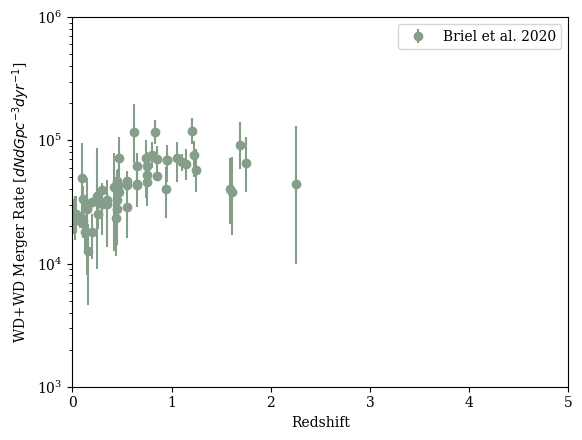

In [53]:
## seeing if this plot matches Max Briel's paper
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error, fmt='o', color = '#849E8A',label='Briel et al. 2020')

plt.yscale('log')
plt.ylabel(r"WD+WD Merger Rate [$dNdGpc^{-3}dyr^{-1}$]")
plt.xlabel(r"Redshift")
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()
plt.xlim(0,5)
plt.ylim(10**3,10**6)

In [54]:
## checking around z = 1.5 to see what I am doing differently to produce different error than Briel

np.where(np.array(redshifts_briel)==1.59)[0]
print("rates at z=1.59:",rates_briel[55])

print("un-converted lower uncertainty limit at z=1.59:",lower_limits[55])
print("lower uncertainty limit at z=1.59:",converted_lower_limits[55])

print("un-converted higher uncertainty limit at z=1.59:",upper_limits[55])
print("higher uncertainty limit at z=1.59:",converted_upper_limits[55])
# print("the y_err at z=1.59:",converted_y_error[55])

rates at z=1.59: 1.31
un-converted lower uncertainty limit at z=1.59: -0.64
lower uncertainty limit at z=1.59: -19823.300038144
un-converted higher uncertainty limit at z=1.59: 0.99
higher uncertainty limit at z=1.59: 30664.167246503996


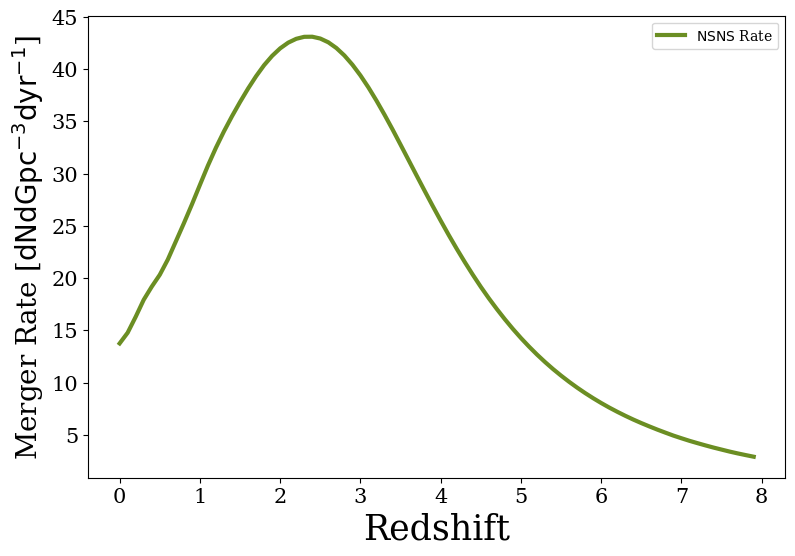

In [55]:
# let's lest plot the different COMPAS version of the rates vs. redshifts
plt.figure(figsize=(9,6))

total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=3,color='olivedrab',label=r'$\mathrm{NSNS}$ Rate')

plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

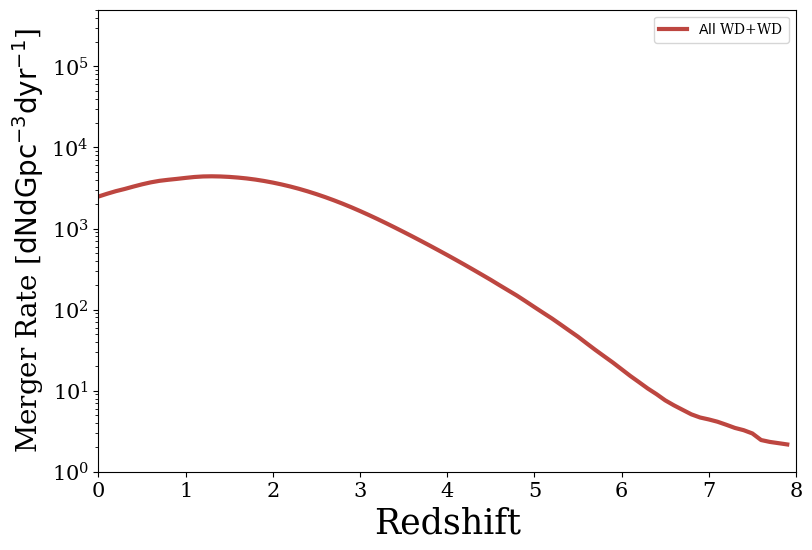

In [56]:

plt.figure(figsize=(9,6))
plt.plot(redshifts[()],total_merger_rate_WD,linewidth=3,color='#BD4640',label=r'$\mathrm{All}$ WD+WD') # all COWD
## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

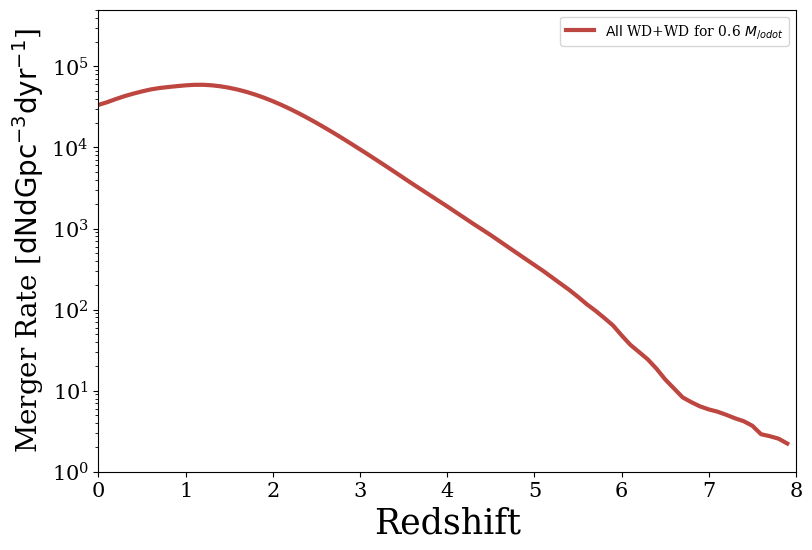

In [57]:

plt.figure(figsize=(9,6))
plt.plot(redshifts[()],total_merger_rate_WD_small,linewidth=3,color='#BD4640',label=r'$\mathrm{All}$ WD+WD for 0.6 $M_{/odot}$') # all COWD
## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

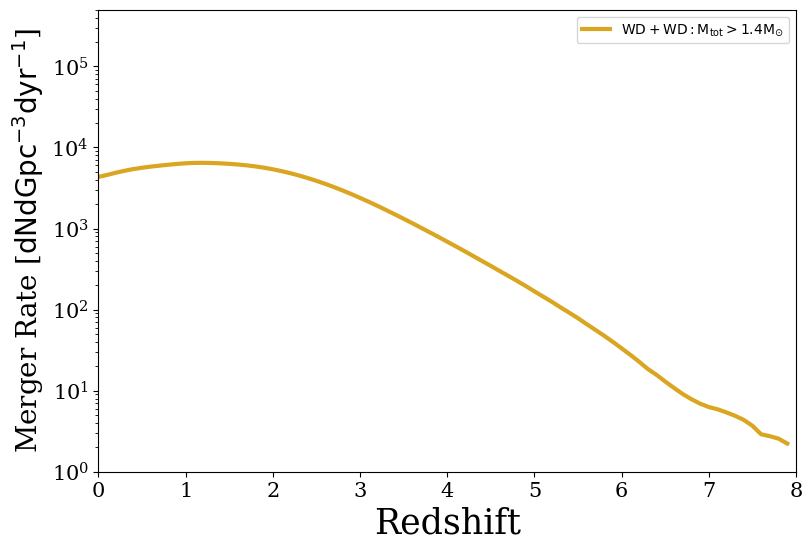

In [58]:
plt.figure(figsize=(9,6))
plt.plot(redshifts[()],chandra_merger_rate,linewidth=3,color='goldenrod',label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')
## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate [$\mathrm{dNdGpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend()

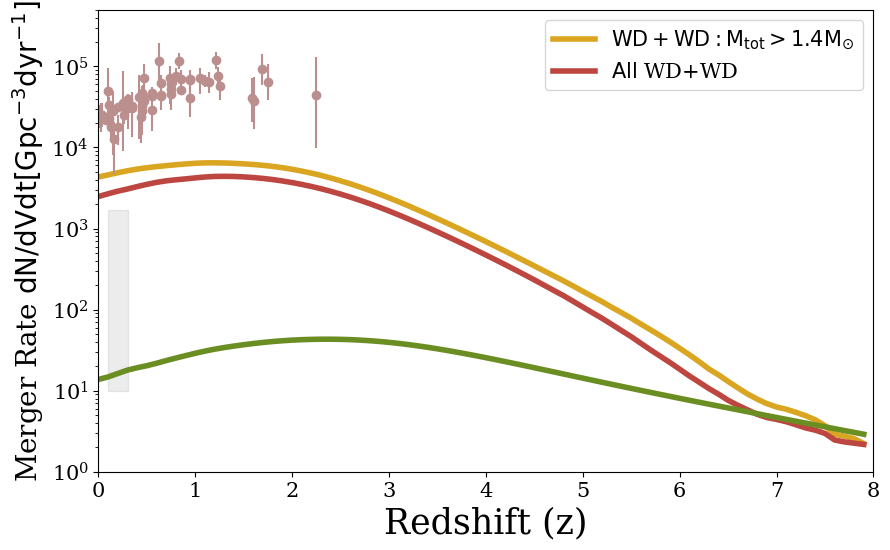

In [59]:
# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
## COMPAS model
plt.plot(redshifts[()],chandra_merger_rate,linewidth=4,color='goldenrod',label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')
plt.plot(redshifts[()],total_merger_rate_WD,linewidth=4,color='#BD4640',label=r'$\mathrm{All}$ WD+WD')
## COMPAS model version v03.35.03
total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

## Briel et al. 2020
# plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender',label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'rosybrown')#,label='Briel et al. 2022')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Merger Rate $\mathrm{dN/dVdt}$$\mathrm{[Gpc^{-3}dyr^{-1}}]$",fontsize=20)
plt.xlabel(r"Redshift (z)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=15)

## save figure:
#plt.savefig("redshifts_rates_WD_NS.pdf",bbox_inches='tight',pad_inches=0.1)


Let's make a version of the plot above but for a presentation

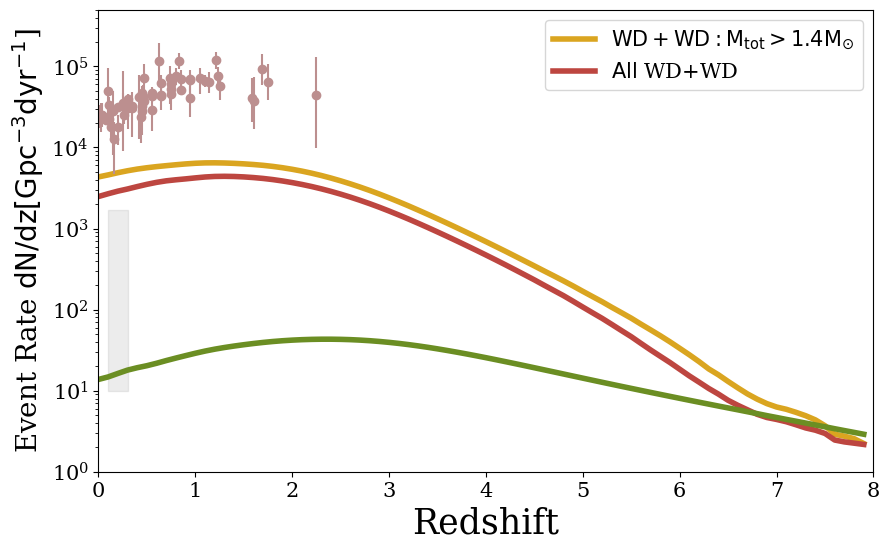

In [60]:
# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
# ## COMPAS model
plt.plot(redshifts[()],chandra_merger_rate,linewidth=4,color='goldenrod',label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')
plt.plot(redshifts[()],total_merger_rate_WD,linewidth=4,color='#BD4640',label=r'$\mathrm{All}$ WD+WD')
## COMPAS model version v03.35.03
total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

# ## Briel et al. 2020
plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender')#,label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'rosybrown')#,label='Briel et al. 2022')

# ## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate $\mathrm{dN/dz[Gpc^{-3}dyr^{-1}}$]",fontsize=20)
plt.xlabel(r"Redshift",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=15)

## save figure:
#plt.savefig("redshifts_rates_WD_NS.pdf",bbox_inches='tight',pad_inches=0.1)


#### Let's now add the rate lines for different slices of total masses! Let's do Mtot > 1.3, 1.2, 1.1, 1.0,

In [61]:
# selecting different slices for M_tot
# mtot>1.3
tot_mass_13_bool = DCO_COWD_SN['Mass(1)'] + DCO_COWD_SN['Mass(2)'] > 1.3 # making the bool
DCO_COWD_SN_mass_13 = DCO_COWD_SN[tot_mass_13_bool] # using the bool to slice the data

# mtot>1.2
tot_mass_12_bool = DCO_COWD_SN['Mass(1)'] + DCO_COWD_SN['Mass(2)'] > 1.2
DCO_COWD_SN_mass_12 = DCO_COWD_SN[tot_mass_12_bool]

# mtot>1.1
tot_mass_11_bool = DCO_COWD_SN['Mass(1)'] + DCO_COWD_SN['Mass(2)'] > 1.1
DCO_COWD_SN_mass_11 = DCO_COWD_SN[tot_mass_11_bool]

# mtot>1.0
tot_mass_10_bool = DCO_COWD_SN['Mass(1)'] + DCO_COWD_SN['Mass(2)'] > 1.0
DCO_COWD_SN_mass_10 = DCO_COWD_SN[tot_mass_10_bool]

Let's also make mass cuts but specifically for the COWDs with other WDs

In [62]:
DCO_COWD_SN['M_moremass'] = DCO_COWD_SN[['Mass(1)', 'Mass(2)']].max(axis=1)
DCO_COWD_SN['M_lessmass'] = DCO_COWD_SN[['Mass(1)', 'Mass(2)']].min(axis=1)

/tmp/ipykernel_66990/2069429372.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DCO_COWD_SN['M_moremass'] = DCO_COWD_SN[['Mass(1)', 'Mass(2)']].max(axis=1)
/tmp/ipykernel_66990/2069429372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DCO_COWD_SN['M_moremass'] = DCO_COWD_SN[['Mass(1)', 'Mass(2)']].max(axis=1)
/tmp/ipykernel_66990/2069429372.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining a

In [63]:
DCO_COWD_SMALL['M_moremass'] = DCO_COWD_SMALL[['Mass(1)', 'Mass(2)']].max(axis=1)
DCO_COWD_SMALL['M_lessmass'] = DCO_COWD_SMALL[['Mass(1)', 'Mass(2)']].min(axis=1)

/tmp/ipykernel_66990/4090691155.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  DCO_COWD_SMALL['M_moremass'] = DCO_COWD_SMALL[['Mass(1)', 'Mass(2)']].max(axis=1)
/tmp/ipykernel_66990/4090691155.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DCO_COWD_SMALL['M_moremass'] = DCO_COWD_SMALL[['Mass(1)', 'Mass(2)']].max(axis=1)
/tmp/ipykernel_66990/4090691155.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consid

In [81]:
merging_all_COWD['M_moremass'] = merging_all_COWD[['Mass(1)', 'Mass(2)']].max(axis=1)
merging_all_COWD['M_lessmass'] = merging_all_COWD[['Mass(1)', 'Mass(2)']].min(axis=1)

In [64]:
# np.unique(merging_all_COWD['Stellar_Type(1)'])
# need a COWD core with a certain mass cut
# can do this with two bools - massive_COWD_bool_1 = np.logical_and(stellar_type(1)==11, mass(1)>0.9)
## massive_COWD_bool_2 = np.logical_and(stellar_type(2)==11, mass(2)>0.9)
### np.logical_or(massive_COWD_bool_1,massive_COWD_bool_2) - just want to make sure we have a COWD core that is greater than a certain mass cut

In [65]:
# for now let's only chose systems where the primary star is a COWD
merging_CO_primary = DCO_COWD_SN[DCO_COWD_SN['Stellar_Type(1)']==11]
np.unique(merging_CO_primary['Stellar_Type(1)'])

array([11])

##### Low Mass cuts

In [82]:
# let's start at 0.6 M sol since that is what seems to be the limit from Morán-Fraile et al.

# selecting different slices for M_COWD
# 0.6<m<0.7
cowd_mass_06 = np.logical_and(merging_all_COWD['M_moremass'] > 0.6, merging_all_COWD['M_moremass'] < 0.7)# making the bool
merging_all_COWD_mass_06 = merging_all_COWD[cowd_mass_06] # using the bool to slice the data

# 0.7<m<0.8
cowd_mass_07 = np.logical_and(merging_all_COWD['M_moremass'] > 0.7, merging_all_COWD['M_moremass'] < 0.8)
merging_all_COWD_mass_07 = merging_all_COWD[cowd_mass_07]

# 0.8<m<0.9
cowd_mass_08 = np.logical_and(merging_all_COWD['M_moremass'] > 0.8, merging_all_COWD['M_moremass'] < 0.9)
merging_all_COWD_mass_08 = merging_all_COWD[cowd_mass_08]



##### High mass cuts

In [84]:
# selecting different slices for M_COWD
# 0.9<m<1.0
cowd_mass_09 = np.logical_and(DCO_COWD_SN['M_moremass'] > 0.9, DCO_COWD_SN['M_moremass'] < 1.0)# making the bool
DCO_COWD_SN_mass_09 = DCO_COWD_SN[cowd_mass_09] # using the bool to slice the data

# 1.0<m<1.1
cowd_mass_1 = np.logical_and(DCO_COWD_SN['M_moremass'] > 1.0, DCO_COWD_SN['M_moremass'] < 1.1)
DCO_COWD_SN_mass_1 = DCO_COWD_SN[cowd_mass_1]

# 1.1<m<1.2
cowd_mass_11 = np.logical_and(DCO_COWD_SN['M_moremass'] > 1.1, DCO_COWD_SN['M_moremass'] < 1.2)
DCO_COWD_SN_mass_11 = DCO_COWD_SN[cowd_mass_11]


# m>1.2
cowd_mass_12_more = DCO_COWD_SN['M_moremass'] > 1.2
DCO_COWD_SN_mass_12_more = DCO_COWD_SN[cowd_mass_12_more]

In [69]:
# # let's get where M_tot > certain masses via loops
# mass_cuts = np.array([1.3,1.2,1.1,1.0])
# labels = [13,12,11,10]
# for mass in mass_cuts:
#     for label in labels:
#         tot_mass_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] > mass # making the bool
#         merging_all_COWD_mass+str(label) = merging_all_COWD[tot_mass_bool] # selecting for th especific mass regime

In [86]:
# let's do this again but just for the COWD mass cuts

# gettign the merger rate per system of the first mass cut 
chandra_merger_rate_13 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_13 = np.sum(DCO_COWD_SN_mass_13[DCO_COWD_SN_mass_13.columns[20+s]])
    chandra_merger_rate_13.append(tota_rate_chandra_13)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_12 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_12 = np.sum(DCO_COWD_SN_mass_12[DCO_COWD_SN_mass_12.columns[20+s]])
    chandra_merger_rate_12.append(tota_rate_chandra_12)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_11 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_11 = np.sum(DCO_COWD_SN_mass_11[DCO_COWD_SN_mass_11.columns[20+s]])
    chandra_merger_rate_11.append(tota_rate_chandra_11)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_10 = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_10 = np.sum(DCO_COWD_SN_mass_10[DCO_COWD_SN_mass_10.columns[20+s]])
    chandra_merger_rate_10.append(tota_rate_chandra_10)

In [114]:
# let's do this again but just for the COWD mass cuts, low mass systems 

# gettign the merger rate per system of the first mass cut 
cowd_mass_06_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_6 = np.sum(merging_all_COWD_mass_06[merging_all_COWD_mass_06.columns[20+s]])
    cowd_mass_06_rate.append(tota_rate_chandra_6)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
cowd_mass_07_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_7 = np.sum(merging_all_COWD_mass_07[merging_all_COWD_mass_07.columns[20+s]])
    cowd_mass_07_rate.append(tota_rate_chandra_7)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
cowd_mass_08_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_8 = np.sum(merging_all_COWD_mass_08[merging_all_COWD_mass_08.columns[20+s]])
    cowd_mass_08_rate.append(tota_rate_chandra_8)


In [115]:
# finding the merger rate for each mass slice 

# gettign the merger rate per system of systems with m_cowd < 0.7
cowd_mass_09_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    cowd_mass_09_sum = np.sum(DCO_COWD_SN_mass_09[DCO_COWD_SN_mass_09.columns[20+s]])
    cowd_mass_09_rate.append(cowd_mass_09_sum)


# gettign the merger rate per system of systems with m_cowd < 0.8
cowd_mass_1_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    cowd_mass_1_sum = np.sum(DCO_COWD_SN_mass_1[DCO_COWD_SN_mass_1.columns[20+s]])
    cowd_mass_1_rate.append(cowd_mass_1_sum)

# gettign the merger rate per system of systems with m_cowd < 0.9
cowd_mass_11_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    cowd_mass_11_sum = np.sum(DCO_COWD_SN_mass_11[DCO_COWD_SN_mass_11.columns[20+s]])
    cowd_mass_11_rate.append(cowd_mass_11_sum)


# gettign the merger rate per system of systems with m_cowd > 1
cowd_mass_12_more_rate = []

# looping through each collection of merger rates
for s in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    cowd_mass_12_more_sum = np.sum(DCO_COWD_SN_mass_12_more[DCO_COWD_SN_mass_12_more.columns[20+s]])
    cowd_mass_12_more_rate.append(cowd_mass_12_more_sum)

### Total Mass Cuts Plots

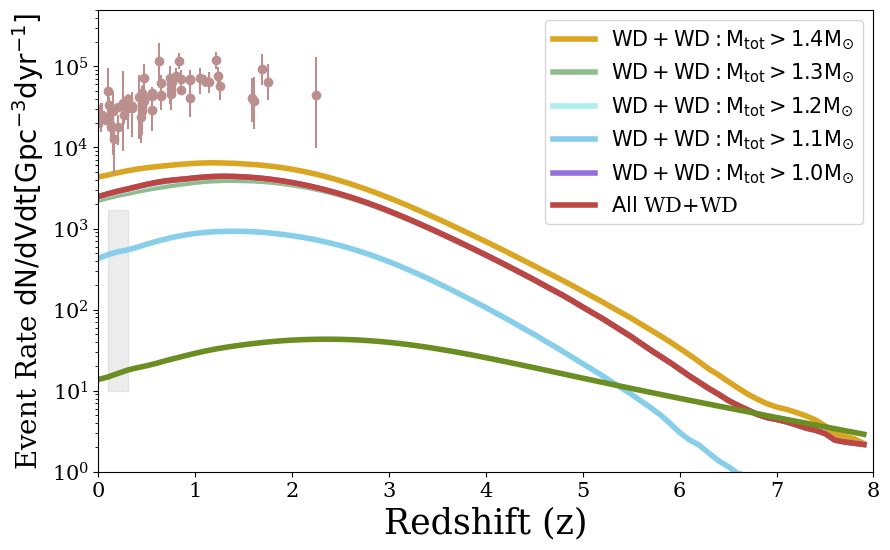

In [116]:
# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
## COMPAS model
#mass slices
plt.plot(redshifts[()],chandra_merger_rate,linewidth=4,color='goldenrod',label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_13,linewidth=4,color='darkseagreen',label=r'$\mathrm{WD+WD: M_{tot} > 1.3 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_12,linewidth=4,color='paleturquoise',label=r'$\mathrm{WD+WD: M_{tot} > 1.2 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_11,linewidth=4,color='skyblue',label=r'$\mathrm{WD+WD: M_{tot} > 1.1 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_10,linewidth=4,color='mediumpurple',label=r'$\mathrm{WD+WD: M_{tot} > 1.0 M_{\odot}}$')

plt.plot(redshifts[()],total_merger_rate_WD,linewidth=4,color='#BD4640',label=r'$\mathrm{All}$ WD+WD')
## COMPAS model version v03.35.03
total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

## Briel et al. 2020
# plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender',label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'rosybrown')#,label='Briel et al. 2022')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate $\mathrm{dN/dVdt}$$\mathrm{[Gpc^{-3}dyr^{-1}}]$",fontsize=20)
plt.xlabel(r"Redshift (z)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=15)

## save figure:
# plt.savefig("redshifts_rates_WD_NS.png",bbox_inches='tight',pad_inches=0.1)


### Low Mass COWD Rates Plot

In [117]:
len(cowd_mass_06_rate)

80

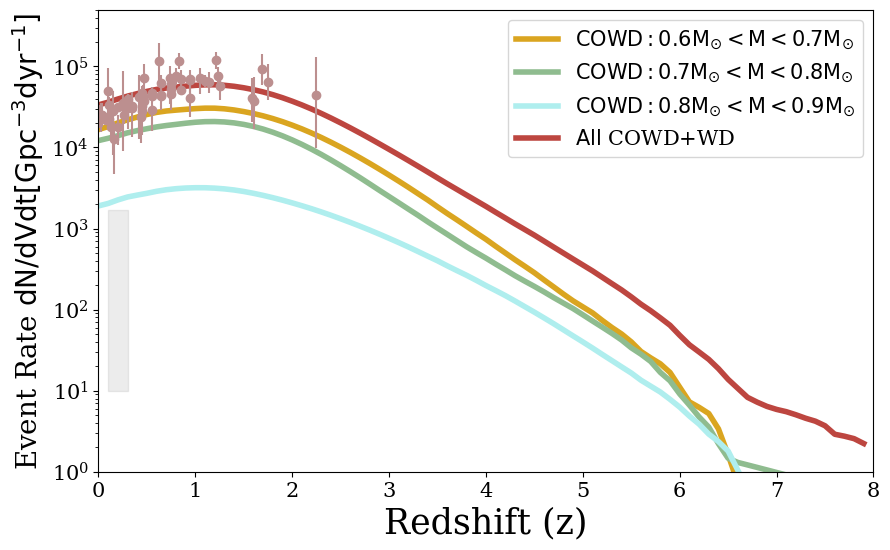

In [119]:
# let's do a similar plot to above but for mass cuts of just COWD and not M_tot

# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
## COMPAS model
#mass slices
plt.plot(redshifts[()],cowd_mass_06_rate,linewidth=4,color='goldenrod',label=r'$\mathrm{COWD: 0.6 M_{\odot} < M < 0.7 M_{\odot}}$')
plt.plot(redshifts[()],cowd_mass_07_rate,linewidth=4,color='darkseagreen',label=r'$\mathrm{COWD: 0.7 M_{\odot} < M < 0.8 M_{\odot}}$')
plt.plot(redshifts[()],cowd_mass_08_rate,linewidth=4,color='paleturquoise',label=r'$\mathrm{COWD: 0.8 M_{\odot} < M < 0.9 M_{\odot}}$')

plt.plot(redshifts[()],total_merger_rate_WD_small,linewidth=4,color='#BD4640',label=r'$\mathrm{All}$ COWD+WD')
## COMPAS model version v03.35.03
total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

# plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab',label=r'NSNS Systems')#,label=r'$\mathrm{BNS}$')

## Briel et al. 2020
# plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender',label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'rosybrown')#,label='Briel et al. 2022')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate $\mathrm{dN/dVdt}$$\mathrm{[Gpc^{-3}dyr^{-1}}]$",fontsize=20)
plt.xlabel(r"Redshift (z)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=15)

## save figure:
# plt.savefig("redshifts_rates_WD_NS.png",bbox_inches='tight',pad_inches=0.1)


### High Mass COWD Rates Plots

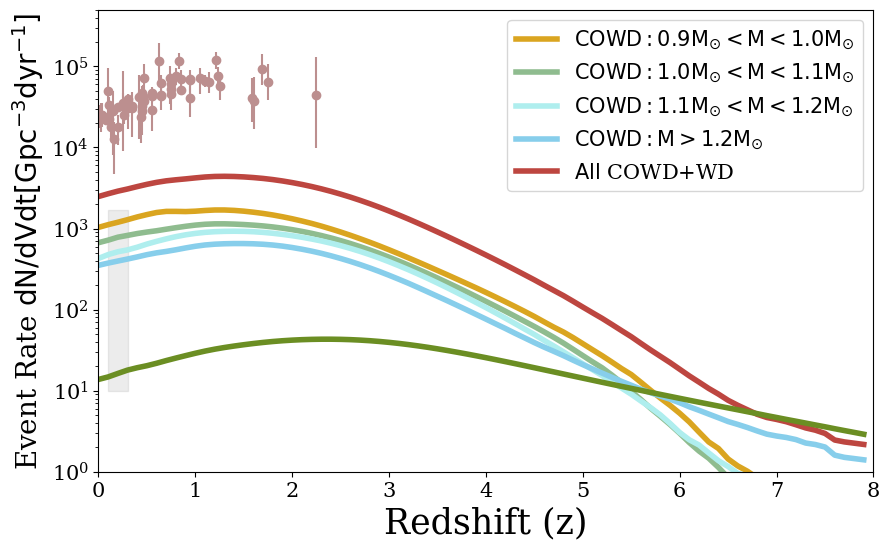

In [120]:
# let's do a similar plot to above but for mass cuts of just COWD and not M_tot

# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
## COMPAS model
#mass slices
plt.plot(redshifts[()],cowd_mass_09_rate,linewidth=4,color='goldenrod',label=r'$\mathrm{COWD: 0.9 M_{\odot} < M < 1.0 M_{\odot}}$')
plt.plot(redshifts[()],cowd_mass_1_rate,linewidth=4,color='darkseagreen',label=r'$\mathrm{COWD: 1.0 M_{\odot} < M < 1.1 M_{\odot}}$')
plt.plot(redshifts[()],cowd_mass_11_rate,linewidth=4,color='paleturquoise',label=r'$\mathrm{COWD: 1.1 M_{\odot} < M < 1.2 M_{\odot}}$')
plt.plot(redshifts[()],cowd_mass_12_more_rate,linewidth=4,color='skyblue',label=r'$\mathrm{COWD: M > 1.2 M_{\odot}}$')

plt.plot(redshifts[()],total_merger_rate_WD,linewidth=4,color='#BD4640',label=r'$\mathrm{All}$ COWD+WD')
## COMPAS model version v03.35.03
total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

## Briel et al. 2020
# plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender',label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'rosybrown')#,label='Briel et al. 2022')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate $\mathrm{dN/dVdt}$$\mathrm{[Gpc^{-3}dyr^{-1}}]$",fontsize=20)
plt.xlabel(r"Redshift (z)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=15)

## save figure:
# plt.savefig("redshifts_rates_WD_NS.png",bbox_inches='tight',pad_inches=0.1)


Text(0, 0.5, 'Stellar Type (2)')

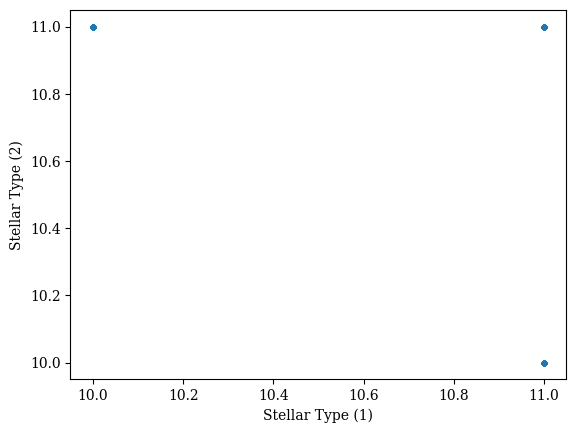

In [125]:
# what are the companions of the COWD slice bwtween 0.6 and 0.7 solar masses 
plt.plot(merging_all_COWD_mass_06['Stellar_Type(1)'],merging_all_COWD_mass_06['Stellar_Type(2)'],'.')
plt.xlabel("Stellar Type (1)")
plt.ylabel("Stellar Type (2)")

In [77]:
# selecting different slices for M_tot less than the mass regiime
# mtot>1.3
tot_mass_less_13_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] < 1.3 # making the bool
merging_all_COWD_mass_less_13 = merging_all_COWD[tot_mass_less_13_bool] # using the bool to slice the data

# mtot>1.2
tot_mass_less_12_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] < 1.2
merging_all_COWD_mass_less_12 = merging_all_COWD[tot_mass_less_12_bool]

# mtot>1.1
tot_mass_less_11_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] < 1.1
merging_all_COWD_mass_less_11 = merging_all_COWD[tot_mass_less_11_bool]

# mtot>1.0
tot_mass_less_10_bool = merging_all_COWD['Mass(1)'] + merging_all_COWD['Mass(2)'] < 1.0
merging_all_COWD_mass_less_10 = merging_all_COWD[tot_mass_less_10_bool]

In [78]:
# finding the merger rate for each mass slice 

# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_less_13 = []

# looping through each collection of merger rates
for a in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_less_13 = np.sum(merging_all_COWD_mass_less_13[merging_all_COWD_mass_less_13.columns[20+a]])
    chandra_merger_rate_less_13.append(tota_rate_chandra_less_13)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_less_12 = []

# looping through each collection of merger rates
for b in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_less_12 = np.sum(merging_all_COWD_mass_less_12[merging_all_COWD_mass_less_12.columns[20+b]])
    chandra_merger_rate_less_12.append(tota_rate_chandra_less_12)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_less_11 = []

# looping through each collection of merger rates
for c in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_less_11 = np.sum(merging_all_COWD_mass_less_11[merging_all_COWD_mass_less_11.columns[20+c]])
    chandra_merger_rate_less_11.append(tota_rate_chandra_less_11)


# gettign the merger rate per system of systems with M_tot > 1.4 solar masses
chandra_merger_rate_less_10 = []

# looping through each collection of merger rates
for d in range(rates_info['merger_rate'][0,:].shape[0]):

    # selecting the mean merger rate for each reshift bin
    tota_rate_chandra_less_10 = np.sum(merging_all_COWD_mass_less_10[merging_all_COWD_mass_less_10.columns[20+d]])
    chandra_merger_rate_less_10.append(tota_rate_chandra_less_10)

NameError: name 'total_merger_rate' is not defined

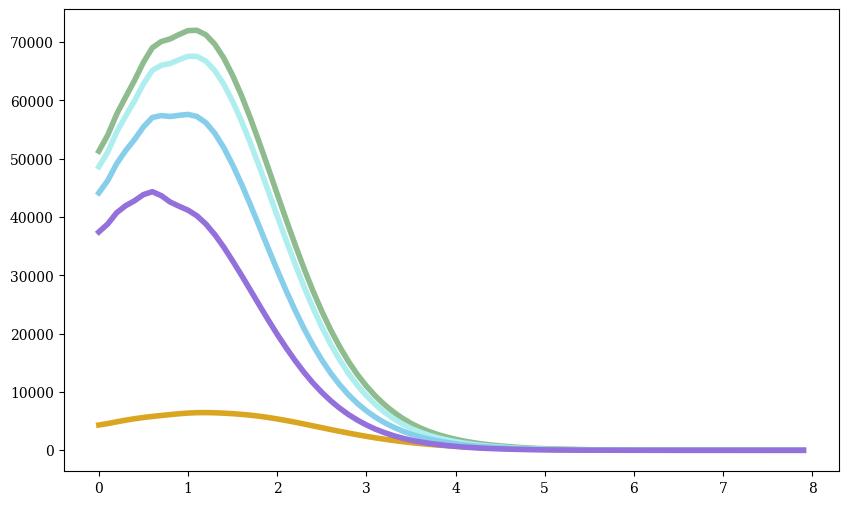

In [79]:
# let's plot the merger rates over redshift

plt.figure(figsize=(10,6))
## COMPAS model
#mass slices
plt.plot(redshifts[()],chandra_merger_rate,linewidth=4,color='goldenrod',label=r'$\mathrm{WD+WD: M_{tot} > 1.4 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_less_13,linewidth=4,color='darkseagreen',label=r'$\mathrm{WD+WD: M_{tot} < 1.3 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_less_12,linewidth=4,color='paleturquoise',label=r'$\mathrm{WD+WD: M_{tot} < 1.2 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_less_11,linewidth=4,color='skyblue',label=r'$\mathrm{WD+WD: M_{tot} < 1.1 M_{\odot}}$')
plt.plot(redshifts[()],chandra_merger_rate_less_10,linewidth=4,color='mediumpurple',label=r'$\mathrm{WD+WD: M_{tot} < 1.0 M_{\odot}}$')

plt.plot(redshifts[()],total_merger_rate,linewidth=4,color='#BD4640',label=r'$\mathrm{All}$ WD+WD')
## COMPAS model version v03.35.03
total_merger_rate_NS_version = np.sum(rates_info_NS['merger_rate'], axis=0)
redshifts_NS = rates_info_NS['redshifts']

plt.plot(redshifts_NS[()],total_merger_rate_NS_version,linewidth=4,color='olivedrab')#,label=r'$\mathrm{BNS}$')

## Briel et al. 2020
# plt.plot(redshifts_briel,converted_rates_briel,'.',color='lavender',label='Briel 2020')
plt.errorbar(redshifts_briel,converted_rates_briel,yerr=y_error,fmt='o', color = 'rosybrown')#,label='Briel et al. 2022')

## LVK BNS rate
plt.fill_between([0.1,0.3], 
                10,
                1700, 
                alpha=0.15, 
                color="grey")#,label=r'LVK BNS Rate $\mathrm{z=0.2}$')


# let's add a line to add important events that have happened
## peak of star formation?
# plt.axvline(3, color='#c7c9a9', linestyle='--', linewidth=2,label='Peak of Star Formation - TNG100')


## axis
plt.xlim(0,8)
plt.ylim(10**0,5*10**5)
plt.yscale('log')
plt.ylabel(r"Event Rate $\mathrm{dN/dVdt}$$\mathrm{[Gpc^{-3}dyr^{-1}}]$",fontsize=20)
plt.xlabel(r"Redshift (z)",fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
# plt.title(r"Binary White Dwarf (WD+WD) Merger Rate Distirbution")
plt.legend(fontsize=15)

## save figure:
#plt.savefig("redshifts_rates_WD_NS.pdf",bbox_inches='tight',pad_inches=0.1)


#### Rates Calculation

In [ ]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg = np.array(merging_all_WD['Time']*1e6) # converting from Myr to yr
t_col_lg = np.array(merging_all_WD['Coalescence_Time']*1e6)

t_delay_lg = [] # this will hold the delay time in Myr

for binaries_lg in range(merging_all_WD.shape[0]):

    delay_lg = time_lg[binaries_lg] + t_col_lg[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg.append(delay_lg)

In [ ]:
print(len(t_delay_lg))
print(len(merging_all_WD[merging_all_WD.columns[20]]))

In [ ]:
# let's make a histogram of the delay times of these BWD with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(t_delay_lg, weights=merging_all_WD[merging_all_WD.columns[20]])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width,label='COMPAS')
# plt.step(center_bins,hist/bin_width,where='mid')

# the age of the universe
age_universe = (13.7e9) # yr

plt.axvline(age_universe, color='r', linestyle='--', linewidth=2,label='Hubble Time')
# plt.annotate('Hubble Time',xy=(1.37e10,10**-5.7),xytext=(1.28e10,10**-5.5),arrowprops=dict(facecolor='black',width=0.1,headwidth=5),horizontalalignment='right',verticalalignment='bottom')

plt.xlabel("Delay Time (yr)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/$dt_{delay}$ [$dNdGpc^{-3}dyr^{-1}$] [$Log_{10}$ Scale]")
plt.title("Delay Time Distribution of the WD+WD that Merged")
plt.legend()


In [ ]:
# take these systems + check tthe immediate RLOF flag
# going into RLOF afte the CE was sucessfully ejected because stars are so close together
# however this CE ejection may no have actually been sucessful and could have MT and merged before ejection
# check if these systems are also stellar merges
rlof_ce_bool = merging_all_WD['Immediate_RLOF>CE']==True
sum(rlof_ce_bool)

In [ ]:
# if these are true then CE on the hertzbrung gab (star would be increasing too rapidly)
ce_bool = merging_all_WD['Optimistic_CE']==True
sum(ce_bool)

In [ ]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(1)']+merging_all_WD['Mass(2)'], weights=merging_all_WD[merging_all_WD.columns[20]])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel(r"Total Mass of the System [$M_{\odot}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/$dM_{tot}$ [$Log_{10}$ Scale]")
plt.title("Combined Mass Distribution of the WD+WD that Merged")

# chandrasekhar limit
plt.axvline(1.4, color='r', linestyle='--', linewidth=2,label='Chandrasekhar Limit')
# plt.annotate('Chandrasekhar Limit',xy=(1.35,10**3),xytext=(1.1,10**3),arrowprops=dict(facecolor='black',width=0.1,headwidth=5),horizontalalignment='right',verticalalignment='bottom')


In [ ]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel(r"Mass of Primary Star [$M_{\odot}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/dM_tot [$Log_{10}$ Scale]")
plt.title("Mass Distribution of the Primary Star")\

# chandrasekhar limit
plt.axvline(1.4, color='r', linestyle='--', linewidth=2)
plt.annotate('Chandrasekhar Limit',xy=(1.35,10**5),xytext=(1.2,10**5),arrowprops=dict(facecolor='black',width=0.1,headwidth=5),horizontalalignment='right',verticalalignment='bottom')



In [ ]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['Mass(2)'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel(r"Mass of Secondary Star [$M_{\odot}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel(r"dR/dM_tot [$Log_{10}$ Scale]")
plt.title("Mass Distribution of the Secondary Star")\

# chandrasekhar limit
plt.axvline(1.4, color='r', linestyle='--', linewidth=2)
plt.annotate('Chandrasekhar Limit',xy=(1.35,10**5),xytext=(1.2,10**5),arrowprops=dict(facecolor='black',width=0.1,headwidth=5),horizontalalignment='right',verticalalignment='bottom')



In [ ]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(merging_all_WD['SemiMajorAxis@DCO'], weights=merging_all_WD['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel(r"Separations of the Systems [$R_{\odot}$]")
plt.yscale('log')
# plt.ylim(1e-1,1e5)
plt.ylabel(r"dR/dr [$Log_{10}$ Scale] []")
plt.title("Separation Distribution")

Let's look at the stellar types and if there are any places where there are oxygen/neon white dwarfs

In [ ]:
ONeWD_bool = np.logical_or(merging_all_WD['Stellar_Type(1)']==12,merging_all_WD['Stellar_Type(2)']==12)
sum(ONeWD_bool)

It seems liek there are no systems that merged within a hubble time that are oxygen neon white dwarfs

In [ ]:
OtherWD_bool = np.logical_or(merging_all_WD['Stellar_Type(1)']==10,merging_all_WD['Stellar_Type(2)']==11)
sum(OtherWD_bool)

In [ ]:
plt.scatter(merging_all_WD['Stellar_Type(1)'],merging_all_WD['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Primary Star")
plt.ylabel("Stellar Type of Secondary Star")

#### Let's look at different mass combinations of the WD+WD

In [ ]:
# let's gather the system parameters group 

SP_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_System_Parameters"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    SP_WD_data[key] = Data_weights["BSE_System_Parameters"][key][()] # adding these columns to the dataframe

In [ ]:
# let's take the seeds from the DCO_mask
# gathering the seeds from the rates.h5 file

dco_seed_mask = rates_info['SEED'][()]
overlap_seeds_bool = np.in1d(SP_WD_data['SEED'],dco_seed_mask)

SP_merging_all_WD = SP_WD_data[overlap_seeds_bool]

In [ ]:
SP_merging_all_WD

Let's add the rates info to this table as well

In [ ]:
# making a new column in the DCO_WD dataset that includes the merger rates at redhsift zero for each system
SP_merging_all_WD['merger_rate_z0'] = rates_info['merger_rate'][:,0]

In [ ]:
pd.set_option('display.max_columns', None)
display(SP_merging_all_WD)

In [ ]:
# filter for things that are flagged as being stellar mergers and also have RLOF_after_CE flag true
# this is like before where the core of a red giant is within the commom envelope and merges with another WD and then produces a merged within the CE not after the CE is sucessfully ejected
merger_bool = SP_merging_all_WD['Merger']==True
sum(merger_bool)

In [ ]:
# let's first look at the units of some parameters to see if anything must be converted
SPs_WD = Data_weights['BSE_System_Parameters']
print(SPs_WD['Mass(1)'].attrs['units']) 
print(SPs_WD['SemiMajorAxis'].attrs['units'])
print(SPs_WD['Time'].attrs['units'])

Let's separate these systems between HeWD and COWD

In [ ]:
plt.scatter(SP_merging_all_WD['Stellar_Type(1)'],SP_merging_all_WD['Stellar_Type(2)'])
plt.xlabel("Stellar Type of Primary Star")
plt.ylabel("Stellar Type of Secondary Star")

Let's select for stellar types that are just HeWD+HeWD and COWD+COWD

In [ ]:
HeWD_bool,COWD_bool,ONeWD_bool,HeCOWD_bool,HeONeWD_bool,COHeWD_bool,COONeWD_bool,ONeHeWD_bool,ONeCOWD_bool = WD_BINARY_BOOLS(SP_merging_all_WD)

hewd_bool = np.logical_or(HeONeWD_bool,np.logical_or(HeWD_bool,HeCOWD_bool))
HeWD_SYS = SP_merging_all_WD[hewd_bool]

cowd_bool = np.logical_or(COONeWD_bool,np.logical_or(COWD_bool,COHeWD_bool))
COWD_SYS = SP_merging_all_WD[cowd_bool]

one_bool = np.logical_or(ONeCOWD_bool,np.logical_or(ONeWD_bool,ONeHeWD_bool))
ONe_SYS = SP_merging_all_WD[one_bool]

#checking if these bools take care of all of the systems
print(sum(hewd_bool)+sum(cowd_bool)+sum(one_bool))

In [ ]:
pd.set_option('display.max_columns', None)
display(HeWD_SYS)

In [ ]:
COWD_SYS

In [ ]:
ONe_SYS

Let's look at a histogram of the masses for each setllar binary type

In [ ]:
pratice_list = np.linspace(0,10,10)
print(pratice_list[1:])
print(pratice_list[:-1])

In [ ]:
# # let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# # below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
# hist, bin_edges = np.histogram(HeWD_SYS['Mass(1)'], weights=HeWD_SYS['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# # plt.step(center_bins,hist/bin_width,where='mid')

# plt.xlabel("Mass of Primary Star (M_sol)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Primary HeWD")

In [ ]:
# # let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# # below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
# hist, bin_edges = np.histogram(HeWD_SYS['Mass(1)']+HeWD_SYS['Mass(2)'], weights=HeWD_SYS['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# # plt.step(center_bins,hist/bin_width,where='mid')

# plt.xlabel("Total Mass of the System (M_sol)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM_tot (natural log)")
# plt.title("Total Mass Spectrum of the Primary HeWD")

For HeWD, let's separate the mass bins into masses below 0.32 M_sun and above 0.32 Msun

In [ ]:
# HeWD_SYS_LOWM = HeWD_SYS.loc[HeWD_SYS['Mass(1)']<0.32]
# HeWD_SYS_HIGHM = HeWD_SYS.loc[HeWD_SYS['Mass(1)']>0.32]

In [ ]:
# # let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# # below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
# hist, bin_edges = np.histogram(COWD_SYS['Mass(1)'], weights=COWD_SYS['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# # plt.step(center_bins,hist/bin_width,where='mid')

# plt.xlabel("Mass of Primary Star (M_sol)")
# plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Primary COWD")

For COWD, let's separate the mass bins for below 0.8 M_sun and above 0.8 M_sun

In [ ]:
# COWD_SYS_LOWM = COWD_SYS.loc[COWD_SYS['Mass(1)']<0.8]
# COWD_SYS_HIGHM = COWD_SYS.loc[COWD_SYS['Mass(1)']>0.8]

In [ ]:
# # let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# # below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
# hist, bin_edges = np.histogram(ONe_SYS['Mass(1)'], weights=ONe_SYS['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# # plt.step(center_bins,hist/bin_width,where='mid')

# plt.xlabel("Mass of Primary Star (M_sol)")
# plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Primary ONeWD")

#### Within these bins let's look at what secondary mass is most common

In [ ]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(HeWD_SYS_LOWM['Mass(2)'], weights=HeWD_SYS_LOWM['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Mass of the Secondary Star (M_sun)")
# plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Secondary HeWD (within M1<0.32)")

In [ ]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(HeWD_SYS_HIGHM['Mass(2)'], weights=HeWD_SYS_HIGHM['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Mass of the Secondary Star (M_sun)")
# plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Secondary HeWD (within M1>0.32)")

In [ ]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(COWD_SYS_LOWM['Mass(2)'], weights=COWD_SYS_LOWM['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Mass of the Secondary Star (M_sun)")
# plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Secondary COWD (within M1<0.80)")

In [ ]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(COWD_SYS_HIGHM['Mass(2)'], weights=COWD_SYS_HIGHM['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Mass of the Secondary Star (M_sun)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Mass Spectrum of the Secondary COWD (within M1>0.80)")

So the results seem like likely couples:

HeWD:
- Mass(1)<0.32 + Mass(2) ~ 0.2 or Mass(2) ~ 0.17
- Mass(1)>0.32 + Mass(2) ~ 0.19

COWD:
- Mass(1)<0.8 + Mass(2) ~ 0.20
- Mass(1)>0.8 + Mass(2) ~ 0.232

Let's slice the data even more to look at the separations that would be needed for these stars to lead to a GW merger

This will allow us to see what mass combinations produce systems that have a coalescence time less than Hubble time

In [ ]:
# # selecting the common secondary mass ranges for the HeWDs
# HeWD_LOWM_SEP = HeWD_SYS_LOWM.loc[np.logical_and(HeWD_SYS_LOWM['Mass(2)']>=0.16,HeWD_SYS_LOWM['Mass(2)']<=0.179)]
# HeWD_HIGHM_SEP = HeWD_SYS_HIGHM.loc[np.logical_and(HeWD_SYS_HIGHM['Mass(2)']>=0.16,HeWD_SYS_HIGHM['Mass(2)']<=0.19)]

# # selecting the common secondary mass ranges for the COWDs
# COWD_LOWM_SEP = COWD_SYS_LOWM.loc[np.logical_and(COWD_SYS_LOWM['Mass(2)']>=0.18,COWD_SYS_LOWM['Mass(2)']<=0.24)]
# COWD_HIGHM_SEP = COWD_SYS_HIGHM.loc[np.logical_and(COWD_SYS_HIGHM['Mass(2)']>=0.230,COWD_SYS_HIGHM['Mass(2)']<=0.26)]



In [ ]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(HeWD_LOWM_SEP['SemiMajorAxis'], weights=HeWD_LOWM_SEP['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Separation (R_sun)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Separation Distirbution of HeWD + WD (with M1<0.32 0.16<M2>0.179)")

In [ ]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(HeWD_HIGHM_SEP['SemiMajorAxis'], weights=HeWD_HIGHM_SEP['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Separation (R_sun)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Separation Distirbution of HeWD + WD (with M1>0.32 0.16<M2>0.19)")

In [ ]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(COWD_LOWM_SEP['SemiMajorAxis'], weights=COWD_LOWM_SEP['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Separation (R_sun)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Separation Distirbution of COWD + WD (with M1<0.8 0.18<M2>0.24)")

In [ ]:
# # below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
# hist, bin_edges = np.histogram(COWD_HIGHM_SEP['SemiMajorAxis'], weights=COWD_HIGHM_SEP['merger_rate_z0'])
# center_bins = (bin_edges[:-1] + bin_edges[1:])/2
# bin_width = np.diff(bin_edges)

# plt.plot(center_bins,hist/bin_width)
# plt.xlabel("Separation (R_sun)")
# # plt.yscale('log')
# # plt.ylim(1e-1,1e3)
# plt.ylabel("dR/dM (natural log)")
# plt.title("The Separation Distirbution of COWD + WD (with M1>0.8 0.23<M2>0.232)")

#### Let's use the peak of these separations distirbutions to find what the coalescence times of the different cases are

In [ ]:
"""
This function will give the maximum separation needed for a bianry to merge within a hubble time given the massesand lifetime of the system
"""
def separations(e,Mmoremass,Mlessmass,t_life):

    """
    e = eccentricity
    t_hubble = age of the universe
    Mmoremass = mass of the more massive compact object (expected in solar masses!)
    Mlessmass = mass of the less massive compact object (expected in solar masses!)
    """

    age_universe = (13.7e9*u.yr).to(u.s)

    if t_life > age_universe.value:
        return print("The age of your binary surpasses that of the age of the universe (ypur binary is still forming).")

    else:

        Mmoremass = (Mmoremass * u.Msun).to(u.kg)
        Mlessmass = (Mlessmass * u.Msun).to(u.kg)

        a_min_den = (1/(5*(const.c**5)))*((age_universe-((t_life*u.Myr).to(u.s)))*(256*(const.G**3)*Mmoremass*Mlessmass*(Mmoremass+Mlessmass)))
        a_min_num = ((1+(0.27*e**10)+(0.33*e**20)+(0.2*e**1000))*(1-(e**2))**(7/2))**(1/4)
        a_min_final = ((a_min_den/a_min_num)**(1/4)).to(u.Rsun)


        return (a_min_final).value

In [ ]:
# let's look at overall data of all of the WD+WD

In [ ]:
# we need to get the lifetime of each case

# the age of the universe
age_universe = (13.7e9)*(1e-6) # converting from yr to Myr

# getting the life time of the binary 
# HeWD
min_m1_hewd = HeWD_SYS[HeWD_SYS['Mass(1)']==min(HeWD_SYS['Mass(1)'])]
min_m2_hewd = HeWD_SYS[HeWD_SYS['Mass(2)']==min(HeWD_SYS['Mass(2)'])]
max_m1_hewd = HeWD_SYS[HeWD_SYS['Mass(1)']==max(HeWD_SYS['Mass(1)'])]
max_m2_hewd = HeWD_SYS[HeWD_SYS['Mass(2)']==max(HeWD_SYS['Mass(2)'])]

lifetime_lowm1_he = np.mean(HeWD_SYS['Time'])
# lifetime_lowm2_he = np.mean(HeWD_SYS['Time'])



# lifetime_highm2_he = np.mean(HeWD_HIGHM_SEP['Time'])
# lifetime_lowm2_co = np.mean(COWD_LOWM_SEP['Time'])
# lifetime_highm2_co = np.mean(COWD_HIGHM_SEP['Time'])

# # getting the delay time
# delay_lowm2_he = t_col_lowm2_he + lifetime_lowm2_he
# delay_highm2_he = t_col_highm2_he + lifetime_highm2_he
# delay_lowm2_co = t_col_lowm2_co + lifetime_lowm2_co
# delay_highm2_co = t_col_highm2_co + lifetime_highm2_co

# delay_times = [delay_lowm2_he,delay_highm2_he,delay_lowm2_co,delay_highm2_co]

In [ ]:
# now let's see what systems merged within a hubble time

### low M1 HeWD
if delay_lowm2_he <= age_universe:
    print("The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 merged within a hubble time. It's delay time was",delay_lowm2_he,"Myr.")
elif delay_lowm2_he > age_universe:
    print("The system w/ a ~ 0.0358, e = 0.00, M1 ~ 0.23, M2 ~ 0.18 did NOT merge within a hubble time")

### high M1 HeWD
if delay_highm2_he <= age_universe:
    print("The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.40, M2 ~ 0.19 merged within a hubble time. It's delay time was",delay_highm2_he,"Myr.")
elif delay_highm2_he > age_universe:
    print("The system w/ a ~ 0.023, e = 0.00, M1 ~ 0.49, M2 ~ 0.19 did NOT merge within a hubble time")

### low M1 COWD
if delay_lowm2_co <= age_universe:
    print("The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 merged within a hubble tim. It's delay time was",delay_lowm2_co,"Myr.")
elif delay_lowm2_co > age_universe:
    print("The system w/ a ~ 0.04, e = 0.00, M1 ~ 0.59, M2 ~ 0.20 did NOT merge within a hubble time")

### high M1 COWD
if delay_highm2_co <= age_universe:
    print("The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 merged within a hubble time. It's delay time was",delay_highm2_co,"Myr.")
elif delay_highm2_co > age_universe:
    print("The system w/ a ~ 0.01, e = 0.00, M1 ~ 0.85, M2 ~ 0.234 did NOT merge within a hubble time")

In [ ]:
# take into account the avrgae lifetime of one of the WD to ten subtract the hubble time from the lifetime and make sure this is less than 1e4 (less than a total delay time of 14 Gyr)
# take a short and long lifetime and compare the results (allow us to see different paraemeters of the pairs that produce caloescence times less than a hubble time)

#### Let's look at all of the WDs not just those that merged within a hubble time

In [ ]:
BWD_BOOL = np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==12,SP_WD_data['Stellar_Type(2)']==11),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==12,SP_WD_data['Stellar_Type(2)']==10),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==11,SP_WD_data['Stellar_Type(2)']==12),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==11,SP_WD_data['Stellar_Type(2)']==10),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==12),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==11),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==10),np.logical_or(np.logical_and(SP_WD_data['Stellar_Type(1)']==10,SP_WD_data['Stellar_Type(2)']==10),np.logical_and(SP_WD_data['Stellar_Type(1)']==11,SP_WD_data['Stellar_Type(2)']==11)))))))))
WDWD_SP_SYS = SP_WD_data[BWD_BOOL]

In [ ]:
WDWD_SP_SYS

Let's now find the total mass distirbution of this system

In [ ]:
# let's grab the merger rates to use as weights 
weight_rates = rates_info['merger_rate'][:,0]

In [ ]:
# let's make a histogram of the masses of these NBS with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change th eshaoe if the distribution
hist, bin_edges = np.histogram(WDWD_SP_SYS['Mass(1)']+WDWD_SP_SYS['Mass(2)'], weights=weight_rates)
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(merging_all_WD['Mass(1)'], weights=merging_all_WD['merger_rate_z0'])
plt.xlabel("Total Mass of the System (M_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dM_tot (natural log)")
plt.title("Total Mass Distribution of all WD+WD")

Let's look at the radii distirbution of each star in the system that merged within a hubble time

In [ ]:
# we want to read in the bse_RLOF to get information about thes different systems

RLOF_WD_data = pd.DataFrame() # making a pandas dataframe

for key in Data_weights["BSE_RLOF"].keys(): #looping through the "keys" or paramters in BSE_System_Parameters

    RLOF_WD_data[key] = Data_weights["BSE_RLOF"][key][()] # adding these columns to the dataframe

In [ ]:
RLOF_WD_data

Let's use our dco mask to only select the systems of interest

In [ ]:
# let's take the seeds from the DCO_mask
# gathering the seeds from the rates.h5 file

dco_seed_mask = rates_info['SEED'][()]
overlap_seeds_bool = np.in1d(RLOF_WD_data['SEED'],dco_seed_mask)

RLOF_merging_all_WD = RLOF_WD_data[overlap_seeds_bool]

In [ ]:
RLOF_merging_all_WD

Since some of the systems show up more than once since they experienced RLOF more than once, we need to select for just WD+WD for the final stellar type to egt the correct systems

In [ ]:
BWD_BOOL = np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==12,RLOF_merging_all_WD['Stellar_Type(2)>MT']==11),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==12,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==11,RLOF_merging_all_WD['Stellar_Type(2)>MT']==12),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==11,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==12),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==11),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_or(np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==10,RLOF_merging_all_WD['Stellar_Type(2)>MT']==10),np.logical_and(RLOF_merging_all_WD['Stellar_Type(1)>MT']==11,RLOF_merging_all_WD['Stellar_Type(2)>MT']==11)))))))))
WDWD_RLOF_SYS = RLOF_merging_all_WD[BWD_BOOL]

In [ ]:
WDWD_RLOF_SYS

These are the systems because there are 1205 of them!

In [ ]:
# let's add the merger rate information ot this table
WDWD_RLOF_SYS['merger_rate_z0'] = rates_info['merger_rate'][:,0]

In [ ]:
RLOF_SYS = Data_weights['BSE_RLOF']
print(RLOF_SYS['Radius(1)>MT'].attrs['units'])

In [ ]:
# let's make a histogram of the radii of these BWD with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(WDWD_RLOF_SYS['Radius(1)>MT'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(WDWD_RLOF_SYS['Mass(1)'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
plt.xlabel("Radius (R_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dr_1 (natural log)")
plt.title("Radius Distribution of the Primary Star")

In [ ]:
# let's make a histogram of the radii of these BWD with the weights of this histogram being the merger rates (to get the mass distrubition curvw), change what pass you are plotting

# below makes it so if i change the number of bins or anything like that it will not change the shape if the distribution
hist, bin_edges = np.histogram(WDWD_RLOF_SYS['Radius(2)>MT'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
center_bins = (bin_edges[:-1] + bin_edges[1:])/2
bin_width = np.diff(bin_edges)

plt.plot(center_bins,hist/bin_width)
# plt.hist(WDWD_RLOF_SYS['Mass(1)'], weights=WDWD_RLOF_SYS['merger_rate_z0'])
plt.xlabel("Radius (R_sol)")
plt.yscale('log')
# plt.ylim(1e-1,1e3)
plt.ylabel("dR/dr_2 (natural log)")
plt.title("Radius Distribution of the Secondary Star")

#### Delay Time Distribution

In [ ]:
# let's convert the columns of the data frame into numpy arrays to be able to do operations with them
time_lg = np.array(WDWD_SYS_LG['Time'])
t_col_lg = np.array(WDWD_SYS_LG['Coalescence_Time'])

t_delay_lg = [] # this will hold the delay time in Myr

for binaries_lg in range(WDWD_SYS_LG.shape[0]):

    delay_lg = time_lg[binaries_lg] + t_col_lg[binaries_lg] # adding the two values together to get the delay time
    t_delay_lg.append(delay_lg)


In [ ]:
Data_rates.close()
Data_weights.close()